<div id="top"/>

# Introductory lecture for [MATH7502](https://courses.smp.uq.edu.au/MATH7502/2019/)

[**Yoni Nazarathy**](https://people.smp.uq.edu.au/YoniNazarathy/)

*Semester 2, 2019, The University of Queensland*

### In this lecture we explore:

* [Julia, Markdown and LaTex formulas](#top)
* [Covariance and correlation](#cov)
* [Markov modelling](#markov)
* [Clustering (k-means)](#cluster)
* [Finding the best line through a cloud of points](#bestfit)
* [General least squares](#least-squares)
* [PCA and data reduction](#pca)
* [Gradient descent](#gradient-descent)
* [Deep neural networks](#deep-neural-networks)
* [Data compression](#data-compression)

> Then in the rest of the course we will actually understand how theses things work.

### Units of the course:

1. Introduction
1. Vectors (week 2) 
1. Using Vectors (week 3) 
1. Matrices (weeks 4 and 5) 
1. Matrices and Vector Spaces (week 6) 
1. Spectral Analysis (weeks 7 and 8) 
1. Least Squares \#1 (weeks 9 and 10) 
1. Least Squares \#2 (weeks 11 and 12) 

> There is also a [course project](https://courses.smp.uq.edu.au/MATH7502/2019/#project-report) where you explore another topic of your choice (from 6 possible options).

## Some resources

* [Markdown-Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
* [Latex Formulas](http://tug.ctan.org/info/undergradmath/undergradmath.pdf)
* [Julia Linear Algebra](https://docs.julialang.org/en/latest/stdlib/LinearAlgebra/)
* [Statistics with Julia book \[SWJ\]](https://people.smp.uq.edu.au/YoniNazarathy/julia-stats/StatisticsWithJulia.pdf)
* [Plots.jl](http://docs.juliaplots.org/latest/)
* [StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl)
* [Flux.jl](https://fluxml.ai/Flux.jl/stable/)

---
## Basic Playground
![Julia logo](https://i0.wp.com/numfocus.org/wp-content/uploads/2016/07/julia-logo-300.png?fit=100%2C300&ssl=1)

This is the density of a normal random variable with mean $\mu$ and variance $\sigma^2$:

$$
\int_{-\infty}^\infty \frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(x-\mu)^2}{2}} \, dx = 1
$$

If $ad-bc \neq 0$:

$$
\begin{bmatrix}
a &b \\ 
c &d
\end{bmatrix}^{-1}
= \frac{1}{ad - bc} 
\begin{bmatrix}
d &-b \\ 
-c &a
\end{bmatrix}
$$

In [7]:
1+1

2

In [12]:
using Pkg
Pkg.status()

    Status `~/.julia/environments/v1.1/Project.toml`
  [c52e3926] Atom v0.8.7
  [336ed68f] CSV v0.5.9
  [aaaa29a8] Clustering v0.13.2
  [717857b8] DSP v0.5.2
  [a93c6f00] DataFrames v0.18.4
  [864edb3b] DataStructures v0.15.0
  [6d1b261a] DiffEqTutorials v0.1.0 #master (https://github.com/JuliaDiffEq/DiffEqTutorials.jl)
  [0c46a032] DifferentialEquations v6.4.0
  [31c24e10] Distributions v0.20.0
  [587475ba] Flux v0.8.3
  [38e38edf] GLM v1.1.1
  [cd3eb016] HTTP v0.8.4
  [09f84164] HypothesisTests v0.8.0
  [7073ff75] IJulia v1.18.1
  [c601a237] Interact v0.10.2
  [a93385a2] JuliaDB v0.12.0
  [e5e0dc1b] Juno v0.7.0
  [6f286f6a] MultivariateStats v0.6.0
  [91a5bcdd] Plots v0.25.1
  [438e738f] PyCall v1.91.2
  [d330b81b] PyPlot v2.8.1
  [ce6b1742] RDatasets v0.6.2
  [2913bbd2] StatsBase v0.30.0
  [f3b207a7] StatsPlots v0.11.0
  [44d3d7a6] Weave v0.9.0


In [11]:
using Pkg
Pkg.add("HTTP")

 Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
  [cd3eb016] + HTTP v0.8.4
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


<div id ="cov"/>

---

## Analysis of covariance and correlation

[top](#top)

In [9]:
using Statistics

X = [0.9 2.1 1.2;
     1.1 1.9 2.5;
     1.7 1.9 3.4;
     0.8 2.3 2.3;
     1.3 1.6 9.4;
     0.7 2.7 1.3;
     0.9 2.1 4.4]

n,p = size(X)

xbar = [mean(X[:,i]) for i in 1:p]'
ourCov = (X .- xbar)'*(X .- xbar)/(n-1)

println(ourCov)
println(cov(X))

[0.119524 -0.087381 0.44; -0.087381 0.121429 -0.715; 0.44 -0.715 8.03333]
[0.119524 -0.087381 0.44; -0.087381 0.121429 -0.715; 0.44 -0.715 8.03333]


Mean1	Mean2	Var1	Var2	Cov


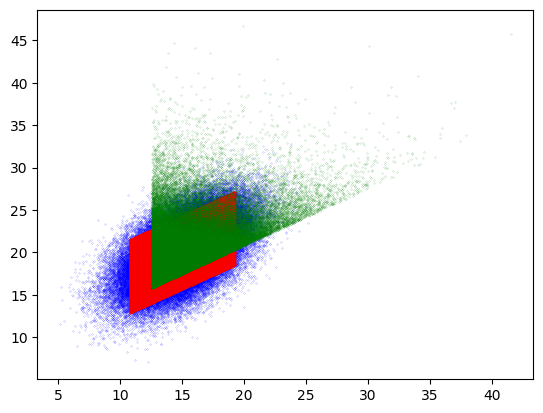

15.0	20.01	6.0	9.0	3.99
15.01	20.01	6.01	9.04	4.01
15.0	19.99	6.01	8.97	3.98


In [31]:
using Distributions, LinearAlgebra, PyPlot

SigY = [ 6 4 ; 4 9]
muY = [15 ; 20]
A = cholesky(SigY).L

N = 10^5

dist_a = Normal()
rvX_a() = [rand(dist_a) ; rand(dist_a)]
rvY_a() = A*rvX_a() + muY
data_a = [rvY_a() for _ in 1:N]
data_a1 = first.(data_a)
data_a2 = last.(data_a)

dist_b = Uniform(-sqrt(3),sqrt(3))
rvX_b() = [rand(dist_b) ; rand(dist_b)]
rvY_b() = A*rvX_b() + muY
data_b = [rvY_b() for _ in 1:N]
data_b1 = first.(data_b)
data_b2 = last.(data_b)

dist_c = Exponential()
rvX_c() = [rand(dist_c) - 1; rand(dist_c) - 1]
rvY_c() = A*rvX_c() + muY
data_c = [rvY_c() for _ in 1:N]
data_c1 = first.(data_c)
data_c2 = last.(data_c)

plot(data_a1,data_a2,".",color="blue",ms=0.2)
plot(data_b1,data_b2,".",color="red",ms=0.2)
plot(data_c1,data_c2,".",color="green",ms=0.2)

stats(data1,data2) = println(
    round(mean(data1),digits=2), "\t", round(mean(data2),digits=2), "\t",
    round(var(data1),digits=2), "\t", round(var(data2),digits=2), "\t",
    round(cov(data1,data2),digits=2))

println("Mean1\tMean2\tVar1\tVar2\tCov")
stats(data_a1,data_a2)
stats(data_b1,data_b2)
stats(data_c1,data_c2)

<div id="markov"/>

---
## Markov Modeling

[top](#top)

In [2]:
using LinearAlgebra, StatsBase

# Transition probability matrix
P = [0.5 0.4 0.1;
     0.3 0.2 0.5;
     0.5 0.3 0.2]

# First way
piProb1 = (P^100)[1,:]

# Second way
A = vcat((P' - I)[1:2,:],ones(3)')
b = [0 0 1]'
piProb2 = A\b

# Third way
eigVecs = eigvecs(copy(P'))
highestVec = eigVecs[:,findmax(abs.(eigvals(P)))[2]]
piProb3 = Array{Float64}(highestVec)/norm(highestVec,1)

# Fourth way
numInState = zeros(3)
state = 1
N = 10^6
for t in 1:N
    numInState[state] += 1
    global state = sample(1:3,weights(P[state,:]))
end
piProb4 = numInState/N

[piProb1 piProb2 piProb3 piProb4]

3×4 Array{Float64,2}:
 0.4375  0.4375  0.4375  0.438221
 0.3125  0.3125  0.3125  0.31252 
 0.25    0.25    0.25    0.249259

<div id="cluster"/>

---
## Clustering (k-means)

[top](#top)

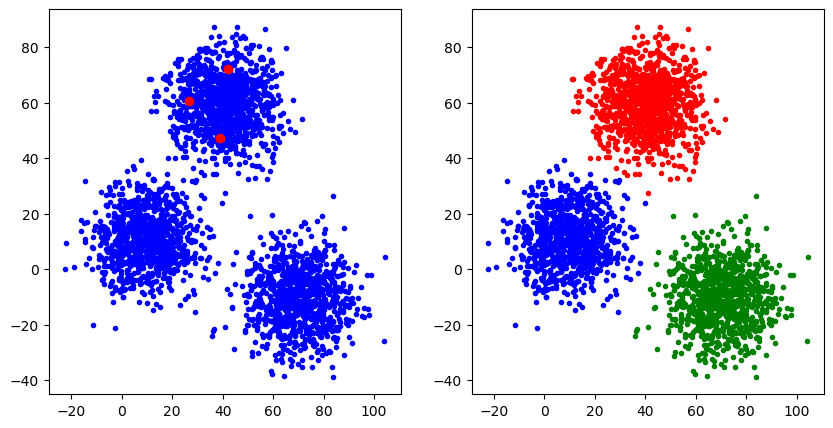

Number of clusters: 3
Counts of clusters: [899, 1149, 952]


┌ Warning: `convert(::Type{Array{T}}, df::AbstractDataFrame) where T` is deprecated, use `convert(Matrix{T}, df)` instead.
│   caller = top-level scope at In[12]:4
└ @ Core In[12]:4


In [12]:
using Clustering, RDatasets, PyPlot

df = dataset("cluster", "xclara")
data = copy(convert(Array{Float64}, df)')

seeds = initseeds(:rand, data, 3)
xclara_kmeans = kmeans(data, 3)

println("Number of clusters: ", nclusters(xclara_kmeans))
println("Counts of clusters: ", counts(xclara_kmeans))

df.Group  = assignments(xclara_kmeans)

fig = figure(figsize=(10, 5))
subplot(121)
plot(df[:, :V1], df[:, :V2],"b.")
plot(df[seeds, :V1], df[seeds, :V2], markersize=12,"r.",)

subplot(122)
plot( df[df.Group .== 1, :V1], df[df.Group .== 1, :V2], "b.")
plot( df[df.Group .== 2, :V1], df[df.Group .== 2, :V2], "r.")
plot( df[df.Group .== 3, :V1], df[df.Group .== 3, :V2], "g.");

In [13]:
using RDatasets, PyPlot, Distributions, Random
Random.seed!(1)

k = 3

xclara = dataset("cluster", "xclara")
n,_ = size(xclara)
dataPoints = [convert(Array{Float64,1},xclara[i,:]) for i in 1:n]
shuffle!(dataPoints)

xMin,xMax = minimum(first.(dataPoints)),maximum(first.(dataPoints))
yMin,yMax = minimum(last.(dataPoints)),maximum(last.(dataPoints))

means = [[rand(Uniform(xMin,xMax)),rand(Uniform(yMin,yMax))]  for _ in 1:k]
labels = rand([1,k],n)
prevMeans = -means

while norm(prevMeans - means) > 0.001
    prevMeans = means
    labels = [findmin([norm(means[i]-x) for i in 1:k])[2]  for x in dataPoints]
    means = [sum(dataPoints[labels .== i])/sum(labels .==i) for i in 1:k]
end

cnts = [sum(labels .== i) for i in 1:k]

println("Counts of clusters (manual implementation): ", cnts)

Counts of clusters (manual implementation): [899, 952, 1149]


<div id="bestfit"/>

---
## Finding the best line through a cloud of points

[top](#top)

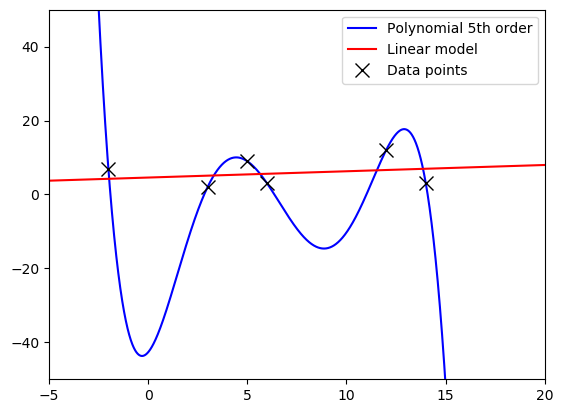

In [19]:
using PyPlot

xVals = [-2,3,5,6,12,14]
yVals = [7,2,9,3,12,3]
n = length(xVals)

V = [xVals[i+1]^(j) for i in 0:n-1, j in 0:n-1]
c = V\yVals
xGrid = -5:0.01:20
f1(x) = c'*[x^i for i in 0:n-1]

beta0, beta1 = 4.58, 0.17
f2(x) = beta0 + beta1*x

plot(xGrid,f1.(xGrid),"b",label="Polynomial 5th order")
plot(xGrid,f2.(xGrid),"r",label="Linear model")
plot(xVals,yVals,"kx",ms="10",label="Data points")
xlim(-5,20)
ylim(-50,50)
legend(loc="upper right")

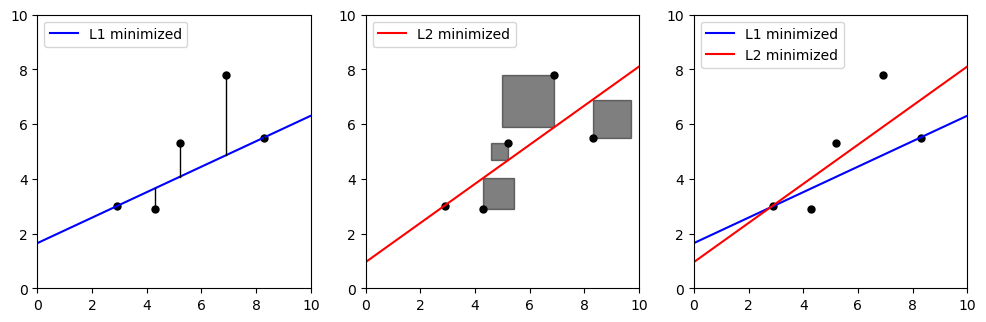

L1 line: 1.65 + 0.47x
L2 line: 0.96 + 0.72x


┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[15]:60
└ @ Core ./In[15]:60
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[15]:60
└ @ Core ./In[15]:60


In [15]:
using DataFrames, Distributions, PyPlot, PyCall, Random, LinearAlgebra, CSV, HTTP

patch = pyimport("matplotlib.patches")
line = pyimport("matplotlib.lines")
Random.seed!(0)

rr = HTTP.request("GET", 
    "https://raw.githubusercontent.com/h-Klok/StatsWithJuliaBook/master/data/L1L2data.csv"; verbose=0)
data = CSV.read(IOBuffer(String(rr.body)))
#data = CSV.read("L1L2data.csv")

xVals, yVals = data.X, data.Y
n, N = 5 , 10^6
alphaMin, alphaMax, betaMin, betaMax = 0, 5, 0, 5
alpha1, beta1, alpha2, beta2, bestL1Cost, bestL2Cost = 0.0,0.0,0.0,0.0,Inf,Inf
for _ in 1:N
    rAlpha,rBeta=rand(Uniform(alphaMin,alphaMax)),rand(Uniform(betaMin,betaMax))
    L1Cost = norm(rAlpha .+ rBeta*xVals - yVals,1)
    if L1Cost < bestL1Cost
        alpha1 = rAlpha
        beta1 = rBeta
        bestL1Cost = L1Cost
    end
    L2Cost = norm(rAlpha .+ rBeta*xVals  - yVals)
    if L2Cost < bestL2Cost
        alpha2 = rAlpha
        beta2 = rBeta
        bestL2Cost = L2Cost
    end
end

fig = figure(figsize=(12,4))
ax1 = fig.add_subplot(1,3,1)
ax1.set_aspect("equal")
plot(xVals,yVals,"k.",ms=10)
plot([0,10],[alpha1, alpha1 .+ beta1*10],"b",label="L1 minimized")
legend(loc="upper left")
xlim(0,10);ylim(0,10)

ax2 = fig.add_subplot(1,3,2)
ax2.set_aspect("equal")
plot(xVals,yVals,"k.",ms=10)
plot([0,10],[alpha2, alpha2 .+ beta2*10],"r",label="L2 minimized")
legend(loc="upper left")
xlim(0,10);ylim(0,10)

ax3 = fig.add_subplot(1,3,3)
ax3.set_aspect("equal")
plot(xVals,yVals,"k.",ms=10)
plot([0,10],[alpha1, alpha1 .+ beta1*10],"b",label="L1 minimized")
plot([0,10],[alpha2, alpha2 .+ beta2*10],"r",label="L2 minimized")
legend(loc="upper left")
xlim(0,10);ylim(0,10)

d = yVals - (alpha2 .+ beta2*xVals)
for i in 1:n
    x,y = xVals[i],yVals[i]
    l=line.Line2D([x, x], [y, alpha1 .+ beta1*x], lw=1,color="black")
    r=patch.Rectangle([x,y],-d[i],-d[i],lw=1,ec="black",fc="black",alpha=0.5)
    ax1[:add_artist](l);ax2[:add_artist](r)
end
println("L1 line: $(round(alpha1,digits = 2)) + $(round(beta1,digits = 2))x")
println("L2 line: $(round(alpha2,digits = 2)) + $(round(beta2,digits = 2))x")

<div id="least-squares"/>

---
## General least squares

[top](#top)

In [2]:
using DataFrames, GLM, Statistics, LinearAlgebra, CSV, HTTP

r = HTTP.request("GET", 
    "https://raw.githubusercontent.com/h-Klok/StatsWithJuliaBook/master/data/L1L2data.csv"; verbose=0)
data = CSV.read(IOBuffer(String(r.body)))
#data = CSV.read("L1L2data.csv")

xVals, yVals = Array{Float64}(data.X), Array{Float64}(data.Y)
n = length(xVals)
A = [ones(n) xVals]

# Approach A
xBar,yBar = mean(xVals),mean(yVals)
sXX, sXY = ones(n)'*(xVals.-xBar).^2 , dot(xVals.-xBar,yVals.-yBar)
b1A = sXY/sXX
b0A = yBar - b1A*xBar

# Approach B
b1B = cor(xVals,yVals)*(std(yVals)/std(xVals))
b0B = yBar - b1B*xBar

# Approach C
b0C,b1C = A'A \ A'yVals

# Approach D
Adag = inv(A'*A)*A'
b0D,b1D = Adag*yVals

# Approach E
b0E,b1E = pinv(A)*yVals

# Approach F
b0F,b1F = A\yVals

# Approach G
F = qr(A)
Q, R = F.Q, F.R
b0G,b1G = (inv(R)*Q')*yVals

# Approach H
F = svd(A)
V, Sp, Us = F.V, Diagonal(1 ./ F.S), F.U'
b0H,b1H = (V*Sp*Us)*yVals

# Approach I
eta,eps = 0.002,10^-6.
b,bPrev = [0,0], [1,1]
while norm(bPrev-b) > eps
    bPrev = b
    b = b - eta*2*A'*(A*b - yVals)
end
b0I,b1I = b[1],b[2]

# Approach J
modelJ = lm(@formula(Y ~ X), data)
b0J,b1J = coef(modelJ)

# Approach K
modelK = glm(@formula(Y ~ X), data,Normal())
b0K,b1K = coef(modelK)

println(round.([b0A,b0B,b0C,b0D,b0E,b0F,b0G,b0H,b0I,b0J,b0K],digits=3))
println(round.([b1A,b1B,b1C,b1D,b1E,b1F,b1G,b1H,b1I,b1J,b1K],digits=3))

[0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.945, 0.944, 0.945, 0.945]
[0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.716, 0.717, 0.716, 0.716]


In [20]:
using Flux.Data.MNIST, PyPlot, LinearAlgebra
using Flux: onehotbatch

imgs   = MNIST.images()
labels = MNIST.labels()
nTrain = length(imgs)

trainData = vcat([hcat(float.(imgs[i])...) for i in 1:nTrain]...)
trainLabels = labels[1:nTrain]

testImgs = MNIST.images(:test)
testLabels = MNIST.labels(:test)
nTest = length(testImgs)

testData = vcat([hcat(float.(testImgs[i])...) for i in 1:nTest]...)

A = [ones(nTrain) trainData]
Adag = pinv(A)
tfPM(x) = x ? +1 : -1
yDat(k) = tfPM.(onehotbatch(trainLabels,0:9)'[:,k+1])
bets = [Adag*yDat(k) for k in 0:9]

classify(input) = findmax([([1 ; input])'*bets[k] for k in 1:10])[2]-1

predictions = [classify(testData[k,:]) for k in 1:nTest]
confusionMatrix = [sum((predictions .== i) .& (testLabels .== j))
				for i in 0:9, j in 0:9]
accuracy = sum(diag(confusionMatrix))/nTest

println("Accuracy: ", accuracy)
println("Confusion Matrix:")
confusionMatrix

Accuracy: 0.8603
Confusion Matrix:


10×10 Array{Int64,2}:
 944     0   18    4    0   23   18    5   14   15
   0  1107   54   17   22   18   10   40   46   11
   1     2  813   23    6    3    9   16   11    2
   2     2   26  880    1   72    0    6   30   17
   2     3   15    5  881   24   22   26   27   80
   7     1    0   17    5  659   17    0   40    1
  14     5   42    9   10   23  875    1   15    1
   2     1   22   21    2   14    0  884   12   77
   7    14   37   22   11   39    7    0  759    4
   1     0    5   12   44   17    0   50   20  801

In [30]:
imgs[1]

<div id="pca"/>

---
## PCA and data-reduction

[top](#top)

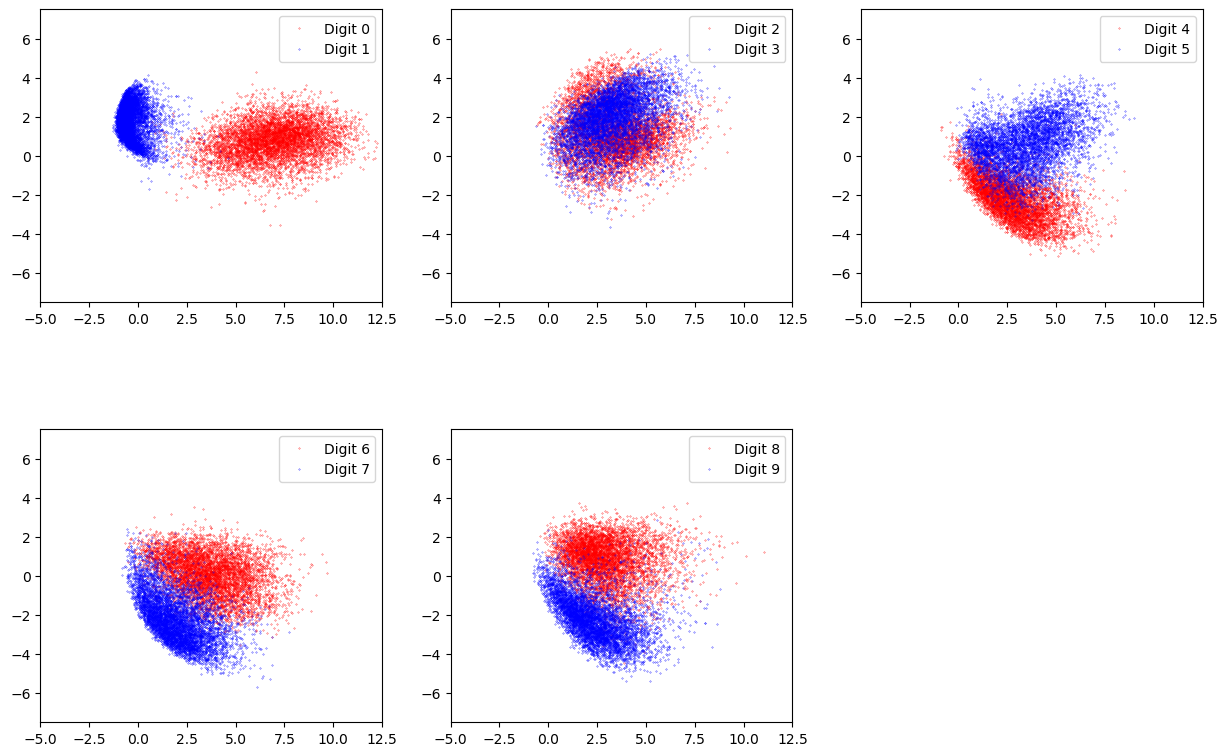

In [19]:
using MultivariateStats, RDatasets, PyPlot, LinearAlgebra, Flux.Data.MNIST

imgs, labels   = MNIST.images(), MNIST.labels()
x = hcat([vcat(float.(im)...) for im in imgs]...)
pca = fit(PCA, x; maxoutdim=2)
M = projection(pca)

function compareDigits(dA,dB)
    imA, imB = imgs[labels .== dA], imgs[labels .== dB]
    xA = hcat([vcat(float.(im)...) for im in imA]...)
    xB = hcat([vcat(float.(im)...) for im in imB]...)
    zA, zB = M'*xA, M'*xB
    plot(zA[1,:],zA[2,:],"r.",ms="0.5",label="Digit $(dA)")
    plot(zB[1,:],zB[2,:],"b.",ms="0.5",label="Digit $(dB)")
    xlim(-5,12.5);ylim(-7.5,7.5)
    legend(loc="upper right")
end

fig = figure(figsize = (15,10))
for k in 1:5
    aFig = fig.add_subplot(2,3,k)
    aFig.set_aspect("equal")
    compareDigits(2k-2,2k-1)
end

<div id="gradient-descent"/>


---
## (Stochastic) Gradient descent

[top](#top)

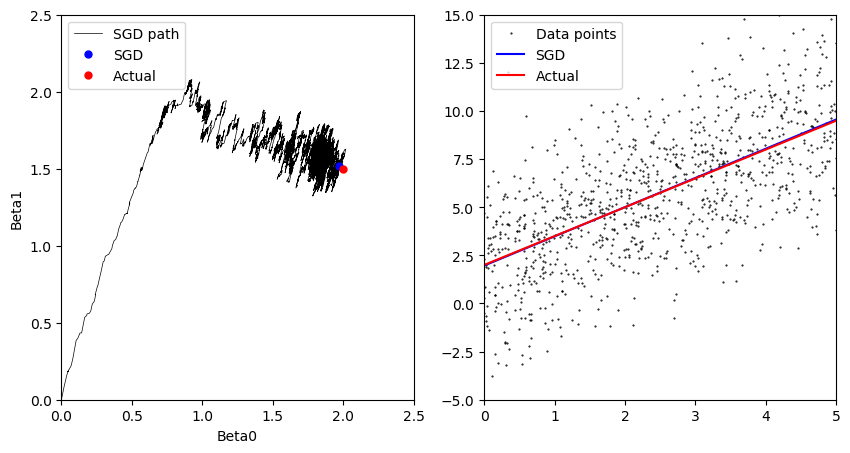

In [17]:
using PyPlot, Random

n = 10^3
beta0 = 2.0
beta1 = 1.5
sigma = 2.5

Random.seed!(1958)
xVals = rand(0:0.01:5,n)
yVals = beta0 .+ beta1*xVals + rand(Normal(0,sigma),n)

pts = []
eta = 10^-3.
b = [0,0]
push!(pts,b)
for k in 1:10^4
    i = rand(1:n)
    g = [   2(b[1] + b[2]*xVals[i]-yVals[i]),
            2*xVals[i]*(b[1] + b[2]*xVals[i]-yVals[i])  ]
    b = b - eta*g
    push!(pts,b)
end

figure(figsize=(10,5))
subplot(121)
plot(first.(pts),last.(pts),"k",lw="0.5",label="SGD path")
plot(b[1],b[2],".b",ms="10.0",label="SGD")
plot(beta0,beta1,".r",ms="10.0",label="Actual")
xlim(0,2.5)
ylim(0,2.5)
legend(loc="upper left")
xlabel("Beta0")
ylabel("Beta1")

subplot(122)
plot(xVals,yVals,"k.",ms="1",label="Data points")
plot([0,5],[b[1],b[1]+5b[2]],"b",label="SGD")
plot([0,5],[beta0,beta0+5*beta1],"r",label="Actual")
xlim(0,5)
ylim(-5,15)
legend(loc="upper left");

<div id="deep-neural-networks"/>


--- 
## Deep neural networks

See also the [Tensor Flow Playground](https://playground.tensorflow.org)

[top](#top)

In [1]:
using Flux, Flux.Data.MNIST, Statistics
using Flux: onehotbatch, onecold, crossentropy, throttle
using Base.Iterators: repeated
# using CuArrays

# Classify MNIST digits with a simple multi-layer-perceptron

imgs = MNIST.images()
# Stack images into one large batch
X = hcat(float.(reshape.(imgs, :))...) |> gpu

labels = MNIST.labels()
# One-hot-encode the labels
Y = onehotbatch(labels, 0:9) |> gpu

m = Chain(
  Dense(28^2, 32, relu),
  Dense(32, 10),
  softmax) |> gpu

loss(x, y) = crossentropy(m(x), y)

accuracy(x, y) = mean(onecold(m(x)) .== onecold(y))

dataset = repeated((X, Y), 200)
evalcb = () -> @show(loss(X, Y))
opt = ADAM()

Flux.train!(loss, params(m), dataset, opt, cb = throttle(evalcb, 10))

accuracy(X, Y)

# Test set accuracy
tX = hcat(float.(reshape.(MNIST.images(:test), :))...) |> gpu
tY = onehotbatch(MNIST.labels(:test), 0:9) |> gpu

accuracy(tX, tY)

loss(X, Y) = 2.294464f0 (tracked)
loss(X, Y) = 1.2462949f0 (tracked)
loss(X, Y) = 0.73402673f0 (tracked)
loss(X, Y) = 0.5317502f0 (tracked)
loss(X, Y) = 0.432176f0 (tracked)
loss(X, Y) = 0.3762382f0 (tracked)
loss(X, Y) = 0.3434717f0 (tracked)
loss(X, Y) = 0.31975254f0 (tracked)
loss(X, Y) = 0.301376f0 (tracked)
loss(X, Y) = 0.28900892f0 (tracked)


0.9228

In [15]:
imgs[8479]

In [16]:
m(X[:,8479])

Tracked 10-element Array{Float32,1}:
 0.000105593346f0
 0.00091172376f0 
 0.0060080816f0  
 0.000117262236f0
 0.0013103485f0  
 0.0002672387f0  
 0.985465f0      
 2.366626f-6     
 0.0056401454f0  
 0.00017217292f0 

<div id="data-compression"/>


---
## Data compression

[top](#top)

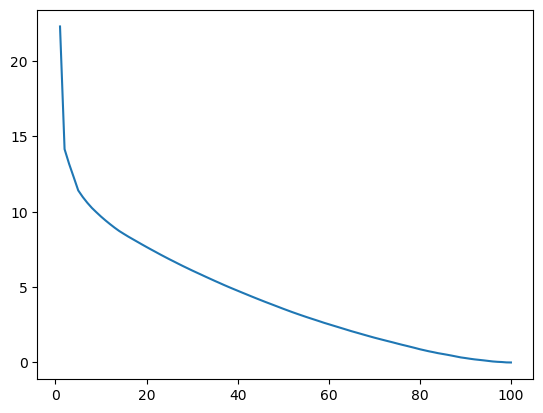

In [24]:
using PyPlot,Distributions, LinearAlgebra

n,m = 100,100
sig = 0.1
pixel(i,j) = ( (i-50)^2+(j-50)^2 < 25^2 && (i-50)^2+(j-50)^2 > 10^2) + sig*rand(Normal())
A = [pixel(i,j) for i in 1:n, j in 1:m]

p = min(n,m)
U,S,V = svd(A);
svdApprox(k) = U[:,1:k]*diagm(0=>S[1:k])*V[:,1:k]'
err = [norm(A-svdApprox(k)) for k in 1:p]
plot(1:p,err);

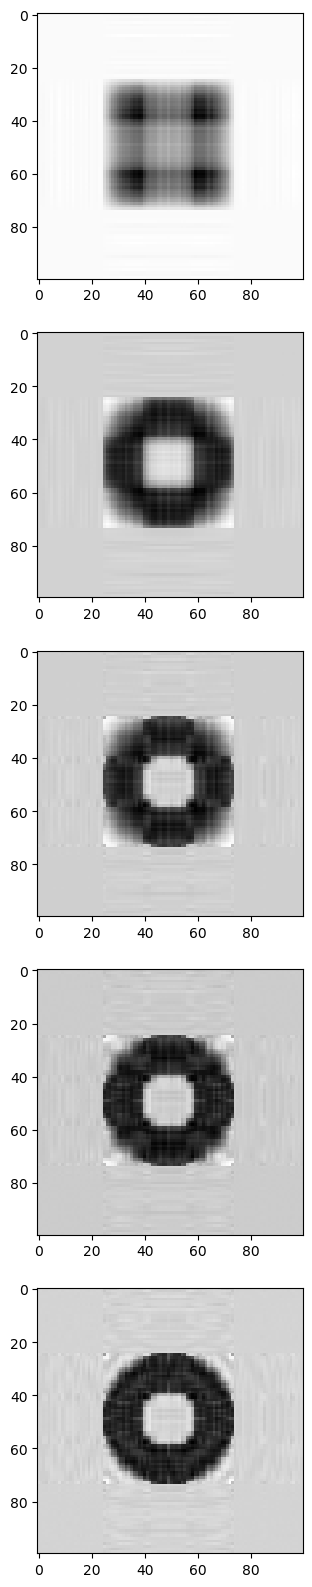

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = top-level scope at In[26]:4
└ @ Core ./In[26]:4
┌ Warning: `getindex(o::PyObject, s::Symbol)` is deprecated in favor of dot overloading (`getproperty`) so elements should now be accessed as e.g. `o.s` instead of `o[:s]`.
│   caller = top-level scope at In[26]:5
└ @ Core ./In[26]:5


In [26]:
fig = figure(figsize=(20,20))
d = 5
for k in 1:d
    imm = fig[:add_subplot](d,1,k)
    imm[:imshow](svdApprox(k),cmap="Greys")
end

--- 

---

---

[top](#top)